# The flexible interface

In the previous tutorial, we have demonstrated how `sbi` can be used to run simulation-based inference with just a single line of code.

In addition to this simple interface, `sbi` also provides a **flexible interface** which unlocks several additional features implemented in `sbi`.

Note, you find the original version of this notebook at [https://github.com/mackelab/sbi/blob/main/tutorial/02_flexible_interface.ipynb](https://github.com/mackelab/sbi/blob/main/tutorial/02_flexible_interface.ipynb) in the `sbi` repository.

## Features

The flexible interface offers the following features:

- performing sequential posterior estimation by using multiple rounds. This can decrease the number of simulations one has to run, but the inference procedure is no longer amortized ([tutorial](https://www.mackelab.org/sbi/tutorial/03_multiround_inference/)).    
- specify your own density estimator, or change hyperparameters of existing ones (e.g. number of hidden units for [NSF](https://arxiv.org/abs/1906.04032)) ([tutorial](https://www.mackelab.org/sbi/tutorial/04_density_estimators/)).    
- use an `embedding_net` to learn summary features from high-dimensional simulation outputs ([tutorial](https://www.mackelab.org/sbi/tutorial/05_embedding_net/)).  
- provide presimulated data ([tutorial](https://www.mackelab.org/sbi/tutorial/06_provide_presimulated/))  
- run simulations in batches, which can speed up simulations.  
- when it makes sense, choose between different methods to sample from the posterior.  
- use calibration kernels as proposed by [Lueckmann, Goncalves et al. 2017](https://arxiv.org/abs/1711.01861).

## Linear Gaussian example

We will show an example of how we can use the flexible interface to infer the posterior for an example with a Gaussian likelihood (same example as before). First, we import the inference method we want to use (`SNPE`, `SNLE`, or `SNRE`) and other helper functions.

In [4]:
import torch

from sbi.inference import SNPE, prepare_for_sbi
from sbi.utils.get_nn_models import posterior_nn
import sbi.utils as utils

Next, we define the prior and simulator:

In [5]:
num_dim = 3
prior = utils.BoxUniform(low=-2*torch.ones(num_dim), 
                         high=2*torch.ones(num_dim))

In [6]:
def linear_gaussian(theta):
    return theta + 1.0 + torch.randn_like(theta) * 0.1

In the flexible interface, you have to ensure that your simulator and prior adhere the requirements of `sbi`. You can do so with the `prepare_for_sbi()` function.

In [9]:
simulator, prior = prepare_for_sbi(linear_gaussian, prior)

Then, we instantiate the inference object:

In [10]:
inference = SNPE(simulator, prior)

And then, we run inference. The last argument `proposal=None` below indicates that the parameters should be drawn from the prior (`None` is also the default value). You can find a full list of arguments [here](https://www.mackelab.org/sbi/reference/#sbi.inference.snpe.snpe_c.SNPE_C).

In [11]:
posterior = inference(num_simulations=500, proposal=None)


Neural network successfully converged after 142 epochs.


Once we have obtained the posterior, we can `.sample()`, `.log_prob()`, or `.pairplot()` in the same way as for the simple interface.

In [13]:
x_o = torch.zeros(3,)

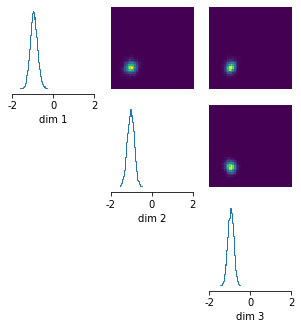

In [14]:
posterior_samples = posterior.sample((10000,), x=x_o)

# plot posterior samples
_ = utils.pairplot(posterior_samples, limits=[[-2,2],[-2,2],[-2,2]], 
                   fig_size=(5,5))

We can always print the posterior to know how it was trained:

In [15]:
print(posterior)

Posterior conditional density p(θ|x) (amortized).

This DirectPosterior-object was obtained with a SNPE-class method using a flow.
It allows to .sample() and .log_prob() the posterior and wraps the output of the .net to avoid leakage into regions with 0 prior probability.
